<a href="https://colab.research.google.com/github/mazen200/AI_Labs/blob/Linear-and-Polynomial-Regression/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder


In [92]:
from sklearn.preprocessing import LabelEncoder
def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X


In [93]:
data = pd.read_csv('/content/fifa22.csv')

In [94]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
0,L. Messi,31,Argentina,94,94,FC Barcelona,RF,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,ST,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,LW,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,GK,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,RCM,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,102.0


In [95]:
#Drop the rows that contain missing values
data.dropna(how='any',inplace=True)
data.drop('Name',axis=1,inplace = True)
cols=('Nationality','Club','Position')
data = Feature_Encoder(data.iloc[:,1:40],cols)
X=data.iloc[:,1:40] #Features
Y=data['Value'] #Label

In [96]:
data.head()

,Nationality,Overall,Potential,Club,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
0,6,94,94,212,21,84.0,95.0,70.0,90.0,86.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,110.5
1,122,94,94,326,26,84.0,94.0,89.0,81.0,87.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,77.0
2,20,92,93,435,14,79.0,87.0,62.0,84.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,118.5
3,138,91,93,375,5,17.0,13.0,21.0,50.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,72.0
4,13,91,92,374,19,93.0,82.0,55.0,92.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,102.0


In [97]:
print("summution of null",data.isnull().sum())

summution of null Nationality        0
Overall            0
Potential          0
Club               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
Value              0
dtype: int64


In [98]:
#Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [99]:
X_train.head()

,Overall,Potential,Club,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
2692,73,74,474,17,72.0,36.0,60.0,72.0,35.0,62.0,...,48.0,64.0,73.0,73.0,71.0,9.0,12.0,11.0,8.0,3.70
5685,69,70,371,18,38.0,30.0,73.0,58.0,22.0,51.0,...,33.0,61.0,67.0,69.0,65.0,14.0,8.0,16.0,10.0,1.00
16990,55,69,606,2,42.0,31.0,47.0,59.0,36.0,54.0,...,45.0,46.0,51.0,54.0,51.0,14.0,9.0,6.0,6.0,0.16
16316,57,73,588,0,50.0,36.0,45.0,68.0,44.0,52.0,...,53.0,67.0,34.0,41.0,47.0,6.0,9.0,14.0,9.0,0.21
3608,72,72,70,26,73.0,73.0,67.0,76.0,77.0,74.0,...,71.0,70.0,27.0,33.0,32.0,15.0,13.0,12.0,10.0,1.60


In [100]:
y_train.head()

2692     3.70
5685     1.00
16990    0.16
16316    0.21
3608     1.60
Name: Value, dtype: float64

In [102]:
corr = data.corr()
print(corr)

                 Nationality   Overall  Potential      Club  Position  \
Nationality         1.000000 -0.014733   0.004949  0.006799 -0.005462   
Overall            -0.014733  1.000000   0.660409  0.001449  0.067554   
Potential           0.004949  0.660409   1.000000 -0.007240  0.028907   
Club                0.006799  0.001449  -0.007240  1.000000  0.004337   
Position           -0.005462  0.067554   0.028907  0.004337  1.000000   
Crossing           -0.000219  0.395789   0.245928  0.000236  0.218902   
Finishing          -0.011029  0.333418   0.242839  0.002455  0.484030   
HeadingAccuracy    -0.022977  0.341893   0.200605 -0.002341  0.237892   
ShortPassing        0.002508  0.503737   0.368795  0.001195  0.140209   
Volleys            -0.002772  0.391757   0.254062  0.008607  0.393204   
Dribbling          -0.010428  0.373663   0.314940 -0.000472  0.349074   
Curve               0.021307  0.420303   0.278851  0.010151  0.251194   
FKAccuracy         -0.001997  0.397839   0.229913 -

In [103]:
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Value']>0.5)]

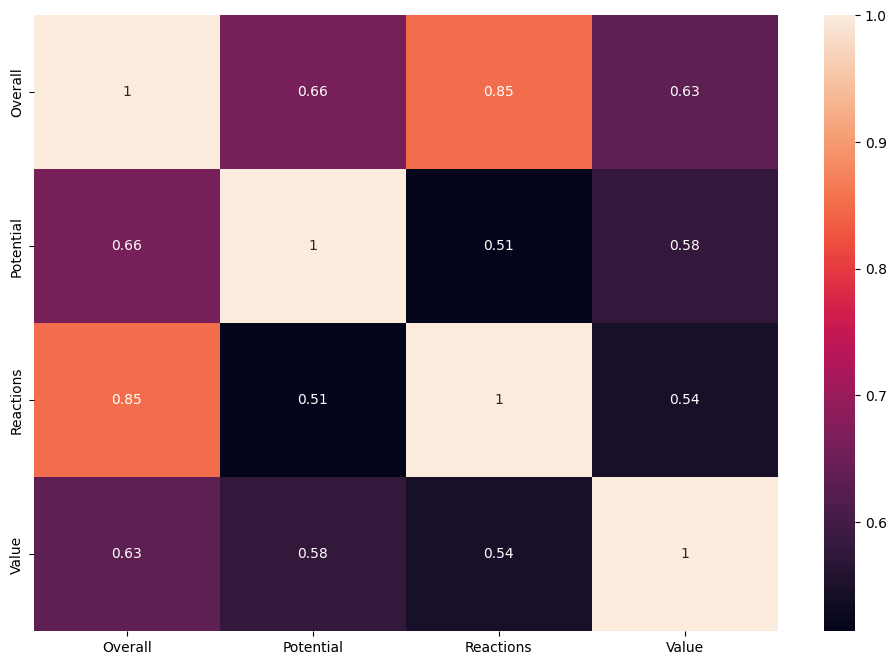

In [104]:
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [106]:
poly_features = PolynomialFeatures(degree=2)

In [107]:
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
print(len(X_train_poly))

12534


In [108]:
# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [110]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [111]:
print(y_train_predicted)

[3.7   1.    0.16  ... 0.3   0.19  0.725]


In [112]:
# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))


In [113]:

print('Co-efficient of linear regression',poly_model.coef_)
print('Intercept of linear regression model',poly_model.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Co-efficient of linear regression [ 1.24559405e-12  1.83099232e-12 -5.70831698e-14  3.20839275e-14
 -1.93485944e-13  1.64705462e-13 -1.91935308e-13 -2.81420070e-13
 -3.19943101e-13  2.72243491e-13  1.04416021e-13 -2.73170890e-13
  1.50775361e-13  3.98036313e-13  1.78894036e-13 -5.14701251e-13
  1.35589890e-13  6.86448714e-13 -5.07758169e-13 -1.68863404e-14
 -1.99323143e-13  1.46660949e-13 -3.60442524e-13  3.25675793e-13
  1.70610460e-13 -1.64914198e-13  8.40794448e-14  2.99327620e-14
  4.88663472e-14 -1.07988759e-13  2.48069387e-14 -7.04336763e-14
 -3.10657397e-14 -8.36673327e-15  3.72122531e-13  1.14305514e-13
 -8.82443760e-14 -5.45346340e-13  1.00000000e+00 -1.34533294e-14
 -6.06190310e-15 -6.17500571e-16 -7.41375751e-15 -2.22765769e-15
  5.66402800e-15  6.15578145e-15  5.88669602e-15 -3.82939191e-15
 -3.51520706e-15  3.75519521e-15 -2.46938903e-15 -7.77458677e-15
 -7.38707598e-15  8.41514019e-15 -2.24653805e-15 -1.00451535e-14
  8.43368852e-15  1.56292317e-15  2.47152017e-15 -2.8328

In [114]:
true_player_value=np.asarray(y_test)[0]
predicted_player_value=prediction[0]
print('True value for the first player in the test set in millions is : ' + str(true_player_value))
print('Predicted value for the first player in the test set in millions is : ' + str(predicted_player_value))

True value for the first player in the test set in millions is : 0.675
Predicted value for the first player in the test set in millions is : 0.6750000000003734
